In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

np.random.seed(17)

### Данные

In [2]:
data = load_digits()

In [3]:
X = data['data']
y = (data['target'] >= 5).astype(np.int32)

<Figure size 640x480 with 0 Axes>

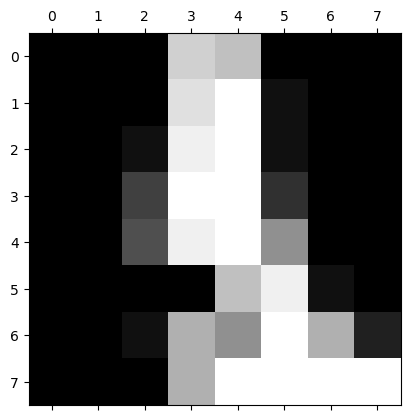

1


In [4]:
plt.gray()
index = np.random.randint(0, len(X) - 1)
plt.matshow(X[index].reshape(8, 8))
plt.show()
print(data.target[index])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.77,
                                                    shuffle=True)

In [6]:
X_train.shape, X_test.shape

((1383, 64), (414, 64))

### Логистическая регрессия

Вычисление предсказания логистической регрессией для объекта $x_i \in \mathbb{R}^n$ :

* $z = w^T x_i + b, \quad w \in \mathbb{R}^n, b \in \mathbb{R}$
* $a = \sigma (z)$

Сигмоида

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

![alt text](https://upload.wikimedia.org/wikipedia/commons/a/ac/Logistic-curve.png)

Логистическая фунция потерь:

$$L_i(a) = -y_i \cdot log(a) - (1 - y_i) \cdot log(1 - a)$$

Производные функции по параметрам:

$$\frac{\partial L_i}{\partial w} = \frac{\partial L_i}{\partial a} \cdot \frac{\partial a}{\partial z}
\cdot \frac{\partial z}{\partial w} = \frac {a - y_i} {a \cdot (1-a)} \cdot a \cdot (1-a) \cdot x_i = (a-y_i) \cdot x_i $$

$$\frac{\partial L_i}{\partial b} = \frac{\partial L_i}{\partial a} \cdot \frac{\partial a}{\partial z}
\cdot \frac{\partial z}{\partial b} = \frac {a - y_i} {a \cdot (1-a)} \cdot a \cdot (1-a) \cdot 1 = a-y_i $$

Используются для минимизации функции потерь $L$ с помощью градиентного спуска.

In [59]:
def log_loss(y_true, y_pred):
    func = 0
    for i in range(len(y_true)):
        func += y_true[i] * np.log(y_pred[i]) + (1 - y_true[i]) * np.log(1 - y_pred[i])
    return -func / len(y_true)

def log_loss_dw(y_true, y_pred, X_test):
    func = 0
    for i in range(len(y_true)):
        func += (y_pred[i] - y_true[i]) * X_test[i]
    return -func

def log_loss_db(y_pred, y_true):
    func = 0
    for i in range(len(y_true)):
        func += y_pred[i] - y_true[i]
    return -func

def sigmoid(x, w, b):
    return 1 / (1 + np.exp(-np.matmul(w, x) + b))

In [8]:
m, n = X_train.shape
print(f'Число объектов в обучающей выборке: {m}\nРазмерность объекта: {n}')

Число объектов в обучающей выборке: 1383
Размерность объекта: 64


<h2>Работа</h2>

In [9]:
X_train

array([[ 0.,  0.,  6., ...,  0.,  0.,  0.],
       [ 0.,  0.,  9., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  9.,  0.,  0.],
       ...,
       [ 0.,  0., 10., ...,  0.,  0.,  0.],
       [ 0.,  6., 16., ..., 11.,  1.,  0.],
       [ 0.,  1.,  8., ...,  0.,  0.,  0.]])

In [10]:
y_train

array([1, 1, 1, ..., 1, 0, 1])

In [11]:
df = pd.DataFrame(X_train)

In [12]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,6.0,11.0,16.0,16.0,3.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,5.0,16.0,13.0,0.0,0.0,0.0
1,0.0,0.0,9.0,16.0,6.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,12.0,14.0,3.0,0.0,0.0,0.0
2,0.0,0.0,1.0,11.0,14.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,1.0,11.0,14.0,9.0,0.0,0.0
3,0.0,0.0,0.0,9.0,16.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,15.0,0.0,0.0,0.0
4,0.0,0.0,10.0,16.0,8.0,0.0,0.0,0.0,0.0,4.0,...,16.0,4.0,0.0,0.0,11.0,15.0,9.0,8.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0.0,0.0,10.0,16.0,16.0,10.0,0.0,0.0,0.0,4.0,...,8.0,0.0,0.0,0.0,13.0,15.0,11.0,8.0,14.0,7.0
1379,0.0,0.0,3.0,12.0,11.0,1.0,0.0,0.0,0.0,1.0,...,3.0,0.0,0.0,0.0,1.0,15.0,14.0,6.0,0.0,0.0
1380,0.0,0.0,10.0,9.0,14.0,10.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,9.0,16.0,7.0,0.0,0.0,0.0
1381,0.0,6.0,16.0,16.0,15.0,7.0,0.0,0.0,0.0,2.0,...,7.0,0.0,0.0,3.0,16.0,16.0,15.0,11.0,1.0,0.0


<h3>Расчёт w</h3>

<i>Зададим начальные значения w и b</i>

In [34]:
X_train[250]

array([ 0.,  0.,  0.,  5., 15.,  3.,  0.,  0.,  0.,  0.,  2., 16.,  4.,
        0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  2., 12.,  0.,  0.,  3.,
       16.,  1.,  0., 11., 10.,  0.,  0.,  9., 13.,  0.,  3., 16.,  5.,
        0.,  0., 13., 15., 16., 16., 12.,  0.,  0.,  0.,  5., 12., 14.,
       16.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  2.,  0.,  0.])

In [81]:
#w = np.full(X_test.shape[1], 0.007).T
b = 0.007
y_pred = []
y_classified = []

for i in range(X_test.shape[0]):
    y_pred.append(sigmoid(X_test[i], w, b))

np.array(y_pred)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [51]:
print(len(w))
print(b)

64
0.007


In [53]:
out = log_loss(y_test, y_pred)
out

1.2141997448604738

<i>Дальше применим метод градиентного спуска для корректировки w и b</i>

In [60]:
log_loss_dw(y_test, y_pred, X_test)

array([-0.00000000e+00, -4.66398576e+01, -8.01537969e+02, -1.91976553e+03,
       -1.88919150e+03, -5.99870770e+02, -2.43993847e+01,  2.39588966e+00,
       -8.22355447e-01, -4.17339347e+02, -1.50078266e+03, -1.99462603e+03,
       -2.08952120e+03, -1.26659425e+03, -1.77664342e+02, -1.03658298e+01,
       -1.78349389e+00, -4.32267599e+02, -1.29595332e+03, -1.34490118e+03,
       -1.70732873e+03, -1.33723630e+03, -3.01309986e+02, -7.07220455e+00,
       -0.00000000e+00, -4.14191976e+02, -1.22521152e+03, -1.26806579e+03,
       -1.68247737e+03, -1.15609485e+03, -4.14549320e+02, -1.84199669e+00,
       -0.00000000e+00, -5.34450886e+02, -1.20084066e+03, -1.33225565e+03,
       -1.71781931e+03, -1.37178197e+03, -4.68601925e+02, -0.00000000e+00,
       -6.42654931e+00, -4.20900306e+02, -1.28159242e+03, -1.37670197e+03,
       -1.35084618e+03, -1.38634143e+03, -5.33627390e+02,  2.72232554e-01,
       -8.31705244e+00, -1.59880686e+02, -1.31982764e+03, -1.65447929e+03,
       -1.94196394e+03, -

In [61]:
log_loss_db(y_pred, y_test)

-166.19399094508768

In [150]:
def norm(w_0, w_1, b_0, b_1, func_0, func_1):
    norm = 0
    for i in range(len(w_0)):
        norm += (w_1[i] - w_0[i]) **2
    norm += (b_1 - b_0) **2
    norm += (func_1 - func_0) **2
    return norm **0.5

In [232]:
alpha = 0.01
lbd = 0.0000001

w_0 = np.full(X_train.shape[1], 0.08).T
b_0 = 0.001


y_pred_0 = []
for i in range(X_train.shape[0]):
    if sigmoid(X_train[i], w_0, b_0) != 1:
        y_pred_0.append(sigmoid(X_train[i], w_0, b_0))
    else:
        y_pred_0.append(0.999)
    
y_pred_0 = np.array(y_pred_0)
func_0 = log_loss(y_train, y_pred_0)

w_1 = w_0 - lbd * log_loss_dw(y_train, y_pred_0, X_train)
b_1 = b_0 - lbd * log_loss_db(y_pred_0, y_train)

y_pred_1 = []
for i in range(X_train.shape[0]):
    if sigmoid(X_train[i], w_1, b_1) != 1:
        y_pred_1.append(sigmoid(X_train[i], w_1, b_1))
    else:
        y_pred_1.append(0.999)
    
y_pred_1 = np.array(y_pred_1)
func_1 = log_loss(y_train, y_pred_1)

value = norm(w_0, w_1, b_0, b_1, func_0, func_1)
print(value)

while value > alpha:
    w_0, b_0 = w_1, b_1
    w_1 = w_0 - lbd * log_loss_dw(y_train, y_pred_0, X_train)
    b_1 = b_0 - lbd * log_loss_db(y_pred_0, y_train)
    y_pred_0 = []
    for i in range(X_train.shape[0]):
        if sigmoid(X_train[i], w_0, b_0) != 1:
            y_pred_0.append(sigmoid(X_train[i], w_0, b_0))
        else:
            y_pred_0.append(0.999)
    
    y_pred_0 = np.array(y_pred_1)

    y_pred_1 = []
    for i in range(X_train.shape[0]):
        if sigmoid(X_train[i], w_1, b_1) != 1:
            y_pred_1.append(sigmoid(X_train[i], w_1, b_1))
        else:
            y_pred_1.append(0.999)
    
    y_pred_1 = np.array(y_pred_1)

    value = norm(w_0, w_1, b_0, b_1, log_loss(y_train, y_pred_0), log_loss(y_train, y_pred_1))
    #print(w)
    #print(b)
    print(f'Функция потерь: {log_loss(y_train, y_pred_1)}')
    #print(f'Производная по w{log_loss_dw(y_train, y_pred, X_train)}')
    #print(f'Производная по b{log_loss_db(y_pred, y_train)}')
    print(f'Value = {value}')
    print()
    print()

y_pred_0

0.09174931915387735
Функция потерь: 12.667606603897381
Value = 0.09172687188363257


Функция потерь: 12.7590597012452
Value = 0.09152238459952633


Функция потерь: 12.851042637848407
Value = 0.09205182504668663


Функция потерь: 12.942299179531755
Value = 0.09132597805817723


Функция потерь: 13.034142424513007
Value = 0.09191223812401594


Функция потерь: 13.125239395513127
Value = 0.0911665289109854


Функция потерь: 13.216376607385385
Value = 0.0912067390938353


Функция потерь: 13.28647897463852
Value = 0.07019273297697197


Функция потерь: 13.356908129203351
Value = 0.07051910153285303


Функция потерь: 13.447905514470083
Value = 0.09106701895880757


Функция потерь: 13.539480684845966
Value = 0.09164436477173828


Функция потерь: 13.63061181043835
Value = 0.09120065688786892


Функция потерь: 13.721881910626163
Value = 0.09133952569034953


Функция потерь: 13.812646639666585
Value = 0.09083454080263931


Функция потерь: 13.882257712909436
Value = 0.06970207517044817


Функция пот

array([0.999, 0.999, 0.999, ..., 0.999, 0.999, 0.999])

In [228]:
y_train

array([1, 1, 1, ..., 1, 0, 1])

In [206]:
{i:list(y_test).count(i) for i in list(y_test)}

{0: 209, 1: 205}

In [233]:
{i:list(y_pred_0).count(i) for i in list(y_pred_0)}

{0.999: 1348,
 0.9999999999999998: 21,
 0.9999999999999991: 1,
 0.9999999999999996: 7,
 0.9999999999995406: 1,
 0.9999999999999984: 1,
 0.9999999999999993: 3,
 0.9999999999999967: 1}

In [207]:
w_0 = np.full(X_test.shape[1], 0.00008).T
w_1 = w_0 - lbd * log_loss_dw(y_test, y_pred, X_test)
w_1

array([8.000000e-05, 8.588750e-05, 1.814857e-04, 3.214111e-04,
       3.195993e-04, 1.652508e-04, 8.804460e-05, 8.009720e-05,
       8.009980e-05, 1.307087e-04, 2.741627e-04, 3.290068e-04,
       3.327606e-04, 2.402613e-04, 1.049285e-04, 8.139680e-05,
       8.019980e-05, 1.348827e-04, 2.501952e-04, 2.424156e-04,
       2.806950e-04, 2.452804e-04, 1.166352e-04, 8.079900e-05,
       8.000000e-05, 1.319961e-04, 2.399273e-04, 2.444208e-04,
       2.899791e-04, 2.263926e-04, 1.299152e-04, 8.019980e-05,
       8.000000e-05, 1.429042e-04, 2.310874e-04, 2.517133e-04,
       2.944726e-04, 2.537385e-04, 1.384836e-04, 8.000000e-05,
       8.069930e-05, 1.286323e-04, 2.360153e-04, 2.478966e-04,
       2.467828e-04, 2.524609e-04, 1.480557e-04, 7.999980e-05,
       8.089910e-05, 9.896880e-05, 2.421917e-04, 2.849031e-04,
       3.113235e-04, 2.769510e-04, 1.576414e-04, 8.559260e-05,
       8.000000e-05, 8.508870e-05, 1.861698e-04, 3.266974e-04,
       3.492204e-04, 2.317192e-04, 1.311111e-04, 9.1288

In [208]:
log_loss(y_test, y_pred)

3.487743854772097

In [209]:
y_pred

array([0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999,
       0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999,
       0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999,
       0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999,
       0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999,
       0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999,
       0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999,
       0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999,
       0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999,
       0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999,
       0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999,
       0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999,
       0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999,
       0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999,
       0.999, 0.999,

In [211]:
np.matmul(w_0, X_test[2])

0.0216

In [212]:
np.matmul(w_0, X_test[2]) + b

0.021670000000000002

In [213]:
np.exp(-np.matmul(w_0, X_test[2]) + b)

0.9787001160252474

In [217]:
1 / (1 + np.exp(-np.matmul(w_0, X_test[2]) + b_0))

0.5053972903492374

In [215]:
sigmoid(X_test[2], w_0, b_0)

0.5053972903492374

In [216]:
w_1

array([8.000000e-05, 8.588750e-05, 1.814857e-04, 3.214111e-04,
       3.195993e-04, 1.652508e-04, 8.804460e-05, 8.009720e-05,
       8.009980e-05, 1.307087e-04, 2.741627e-04, 3.290068e-04,
       3.327606e-04, 2.402613e-04, 1.049285e-04, 8.139680e-05,
       8.019980e-05, 1.348827e-04, 2.501952e-04, 2.424156e-04,
       2.806950e-04, 2.452804e-04, 1.166352e-04, 8.079900e-05,
       8.000000e-05, 1.319961e-04, 2.399273e-04, 2.444208e-04,
       2.899791e-04, 2.263926e-04, 1.299152e-04, 8.019980e-05,
       8.000000e-05, 1.429042e-04, 2.310874e-04, 2.517133e-04,
       2.944726e-04, 2.537385e-04, 1.384836e-04, 8.000000e-05,
       8.069930e-05, 1.286323e-04, 2.360153e-04, 2.478966e-04,
       2.467828e-04, 2.524609e-04, 1.480557e-04, 7.999980e-05,
       8.089910e-05, 9.896880e-05, 2.421917e-04, 2.849031e-04,
       3.113235e-04, 2.769510e-04, 1.576414e-04, 8.559260e-05,
       8.000000e-05, 8.508870e-05, 1.861698e-04, 3.266974e-04,
       3.492204e-04, 2.317192e-04, 1.311111e-04, 9.1288

In [218]:
1 / (1 + np.exp(-np.matmul(w_1, X_test[2]) + b_1))

0.516638381126909